In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation

import numpy as np
from scipy import integrate
from numba import jit
from tqdm import tqdm
import time

from BSSolver import B_field_Solver
from WireShape import Wire
from PathSolver import Particle_Path_Solver

# Create Shape of Coils

## Toroidal Coil

In [2]:
myToroidal = Wire()

#Toroidal of major radius R1 and minor radius R2
R1_Toroidal = 1
R2_Toroidal = 0.5
N_Toroidal = 20
step_Toroidal = 0.001

myToroidal.Create_Toroidal_Coil(R1_Toroidal, R2_Toroidal, N_Toroidal, step_Toroidal)
myToroidal.Set_Current(1)

## Plasma Current

In [3]:
myPlasma = Wire()

#Plasma of radius R in the xy plane
C_Plasma = [0,0]
R_Plasma = 1
step_Plasma = 100

myPlasma.Create_Loop(C_Plasma, R_Plasma, step_Plasma, 0, 'xy')
myPlasma.Set_Current(-1)

# Simulation of Trajectories in Tokamak Reactor

In [9]:
myToroidal.Set_Current(5)
myPlasma.Set_Current(-5)
x0 = np.array([1.1, 0.0, 0.0])
v0 = np.array([0.0, 5.0, 0.0])

Particle_Path_Solver_Toroidal = Particle_Path_Solver([-1, myToroidal, myPlasma])
tr = Particle_Path_Solver_Toroidal.trajectory(0.0, x0, v0, dt=0.005, max_iterations=int(5e2))

C:\Users\polol\AppData\Local\Temp\ipykernel_4324\1294706702.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


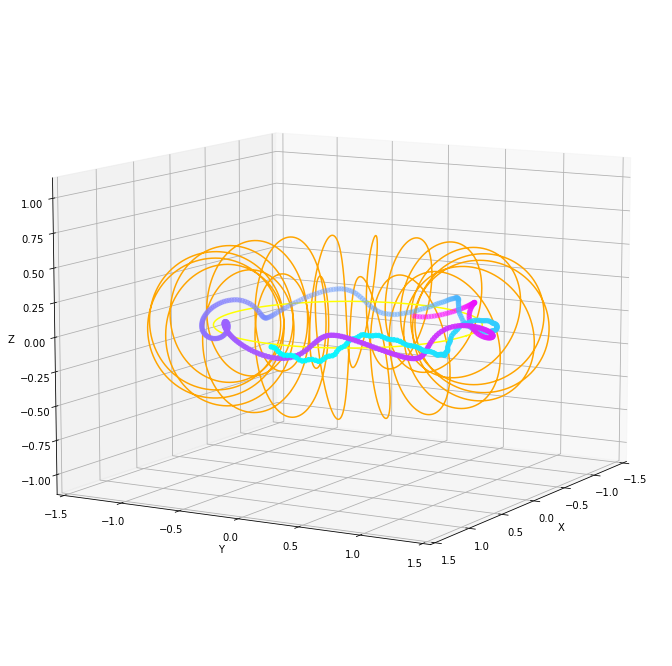

In [10]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.view_init(elev=10, azim=30)

length = len(tr.T[0])
nrm = mpl.colors.Normalize(0,length)
colors = mpl.cm.cool(nrm(range(length)))
ax.scatter(*tr.T[1:], '.', color=colors)

ax.plot3D(*myToroidal.coordz, color='orange')
ax.plot3D(*myPlasma.coordz, color='yellow')

# Setting the axes properties
ax.set_xlim(-1.5,1.5)
ax.set_xlabel('X')

ax.set_ylim(-1.5,1.5)
ax.set_ylabel('Y')

ax.set_zlim(-1.1,1.1)
ax.set_zlabel('Z')

plt.show()

# Animation

C:\Users\polol\AppData\Local\Temp\ipykernel_4324\2619863730.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
MovieWriter imagemagick unavailable; using Pillow instead.


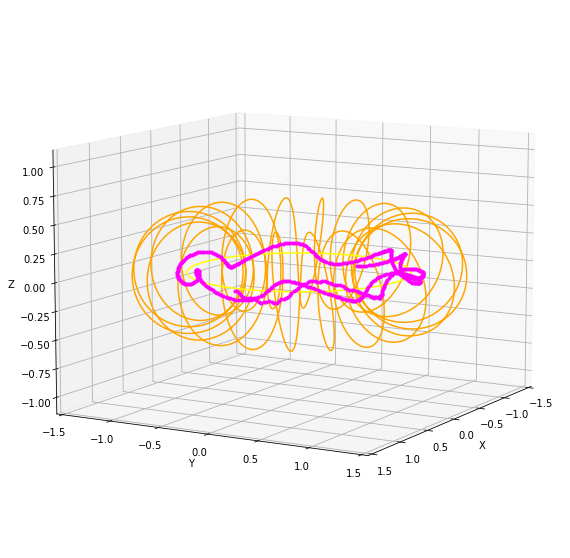

In [11]:
#%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.view_init(elev=10, azim=30)

ax.plot3D(*myToroidal.coordz, color='orange')
ax.plot3D(*myPlasma.coordz, color='yellow')

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    line.set_color(colors[num])

length = len(tr.T[0])
nrm = mpl.colors.Normalize(0,length)
colors = mpl.cm.cool(nrm(range(length)))

data = tr.T[1:]
line, = ax.plot3D(data[0, 0:1], data[1, 0:1], data[2, 0:1], '.', color=colors[0])

# Setting the axes properties
ax.set_xlim(-1.5,1.5)
ax.set_xlabel('X')

ax.set_ylim(-1.5,1.5)
ax.set_ylabel('Y')

ax.set_zlim(-1.1,1.1)
ax.set_zlabel('Z')

anim = animation.FuncAnimation(fig, update, length, fargs=(data, line), interval=20, blit=False)
anim.save('particle.gif', writer='imagemagick')

plt.show()